# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error,classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
# Reading the given Dataset
df = pd.read_excel(r"C:\Users\priya\Downloads\Decision Tree\Decision Tree\heart_disease.xlsx",sheet_name='Heart_disease')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [4]:
#Getting the discriptive statistics
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,908.000000,908,908,908.000000,908.000000,908,908,908.000000,908,846.000000,908,908,908.000000
unique,NaN,2,4,NaN,NaN,2,3,NaN,4,NaN,3,3,NaN
top,NaN,Male,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,normal,NaN
freq,NaN,718,495,NaN,NaN,723,542,NaN,516,NaN,453,386,NaN
mean,53.791850,NaN,NaN,133.430617,201.484581,NaN,NaN,135.957048,NaN,0.891253,NaN,NaN,1.008811
std,9.158031,NaN,NaN,20.401608,112.097949,NaN,NaN,26.804929,NaN,1.093875,NaN,NaN,1.144436
min,29.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,NaN,0.000000
25%,47.750000,NaN,NaN,120.000000,176.750000,NaN,NaN,118.000000,NaN,0.000000,NaN,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,224.000000,NaN,NaN,138.000000,NaN,0.500000,NaN,NaN,1.000000
75%,60.000000,NaN,NaN,144.000000,270.000000,NaN,NaN,156.000000,NaN,1.500000,NaN,NaN,2.000000


In [5]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [6]:
#finding out if there any null values 
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
df['sex']=df['sex'].map({'Male': 1,'Female':0})

In [8]:
df['fbs']=df['fbs'].astype(int)

In [9]:
df['exang'].value_counts()

exang
False    516
True     337
TURE      36
FALSE     19
Name: count, dtype: int64

In [10]:
df['exang']=df['exang'].replace({'FALSE':False,'TURE':True})

In [11]:
df['exang']=df['exang'].astype(int)

In [12]:
df['restecg'].value_counts()

restecg
normal              542
lv hypertrophy      187
st-t abnormality    179
Name: count, dtype: int64

In [13]:
df['restecg']=df['restecg'].replace({'normal':0,'st-t abnormality':1,'lv hypertrophy':2})
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,typical angina,145,233,1,2,150,0,2.3,downsloping,fixed defect,0
1,41,1,atypical angina,135,203,0,0,132,0,0.0,flat,fixed defect,0
2,57,1,asymptomatic,140,192,0,0,148,0,0.4,flat,fixed defect,0
3,52,1,typical angina,118,186,0,2,190,0,0.0,flat,fixed defect,0
4,57,1,asymptomatic,110,201,0,0,126,1,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,asymptomatic,125,0,0,0,120,0,1.5,upsloping,reversable defect,4
904,62,1,asymptomatic,166,170,0,1,120,1,3.0,flat,reversable defect,4
905,56,1,non-anginal,170,0,0,2,123,1,2.5,downsloping,normal,4
906,56,1,non-anginal,144,208,1,1,105,1,NaN,downsloping,fixed defect,4


In [14]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,typical angina,145,233,1,2,150,0,2.3,downsloping,fixed defect,0
1,41,1,atypical angina,135,203,0,0,132,0,0.0,flat,fixed defect,0
2,57,1,asymptomatic,140,192,0,0,148,0,0.4,flat,fixed defect,0
3,52,1,typical angina,118,186,0,2,190,0,0.0,flat,fixed defect,0
4,57,1,asymptomatic,110,201,0,0,126,1,1.5,flat,fixed defect,0


In [15]:
print(f"Precentage of missin values in column olpeak: {df['oldpeak'].isna().mean()*100}")

Precentage of missin values in column olpeak: 6.828193832599119


In [16]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())

In [17]:
df['oldpeak'].isna().sum()

0

# Univariate Analysis

<Figure size 700x2800 with 0 Axes>

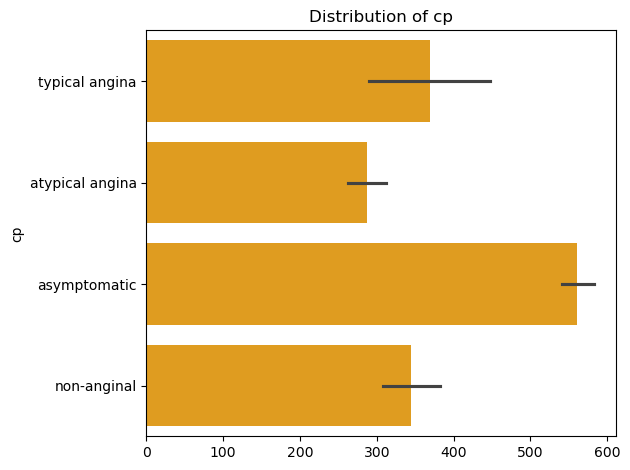

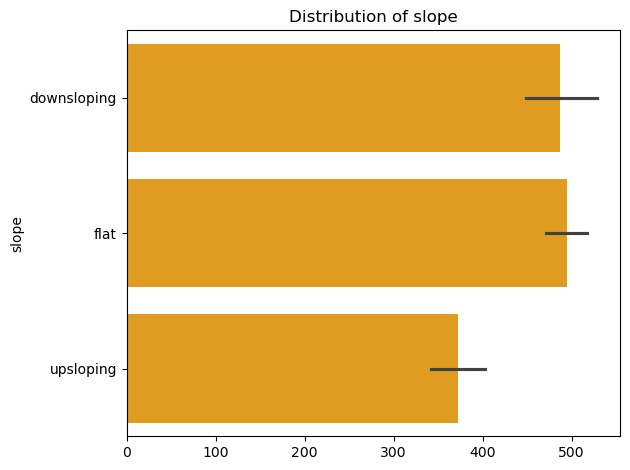

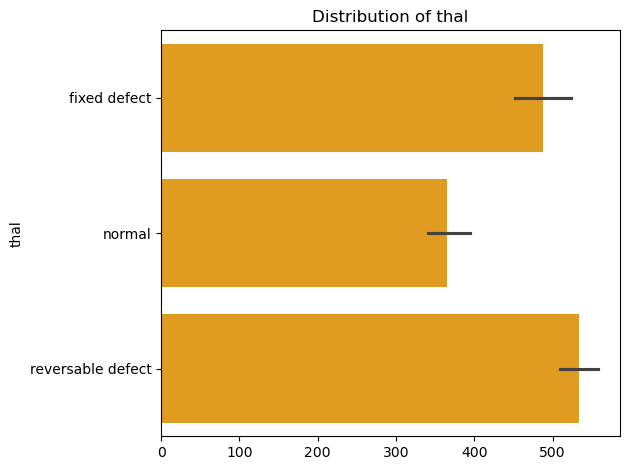

In [18]:
#Barplot for categorical columns
plt.figure(figsize=(7,28))
for i in df.select_dtypes(include=object).columns:
    plt.subplots()
    sns.barplot(df[i],color='Orange')
    plt.title(f'Distribution of {i}')
    plt.tight_layout()
    plt.show()

In [19]:
data = df.select_dtypes(include=int)

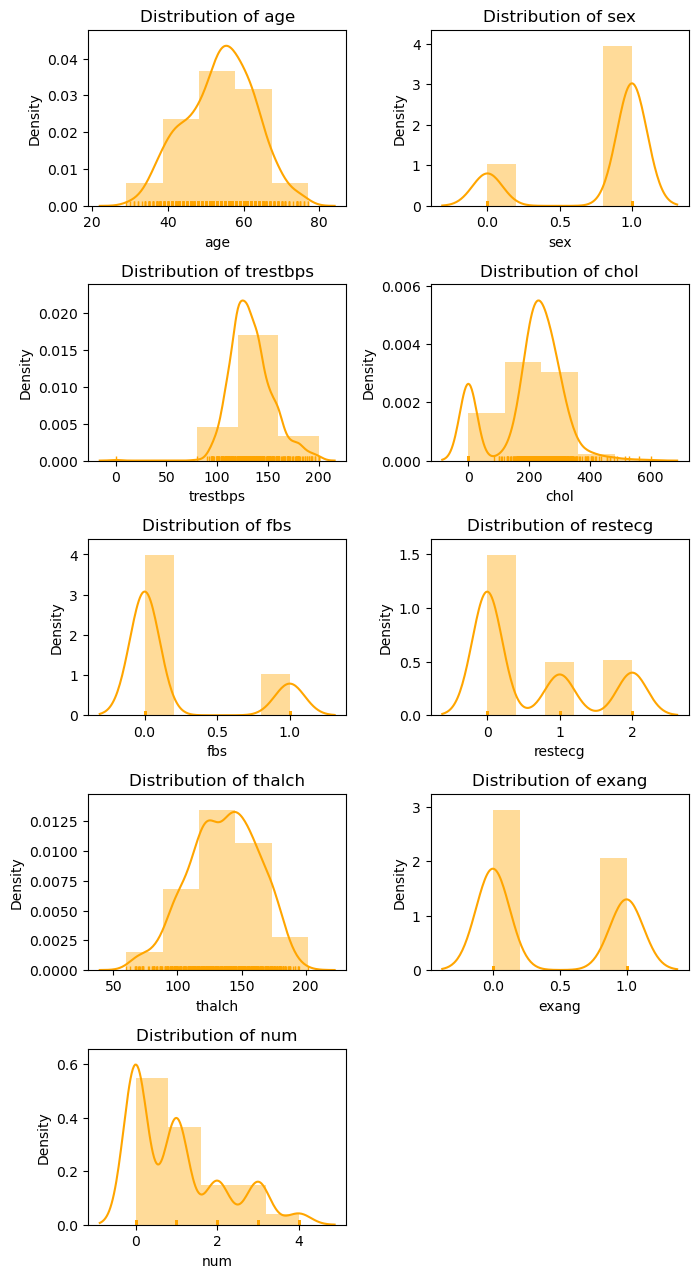

In [20]:
# distribution plot for numerical data
plt.figure(figsize=(7,15))
for i, column in enumerate(data.columns, 1):
    plt.subplot(6,2,i)
    sns.distplot(data[column],color='Orange', bins=5, kde=True, rug=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Biavariate Analysis

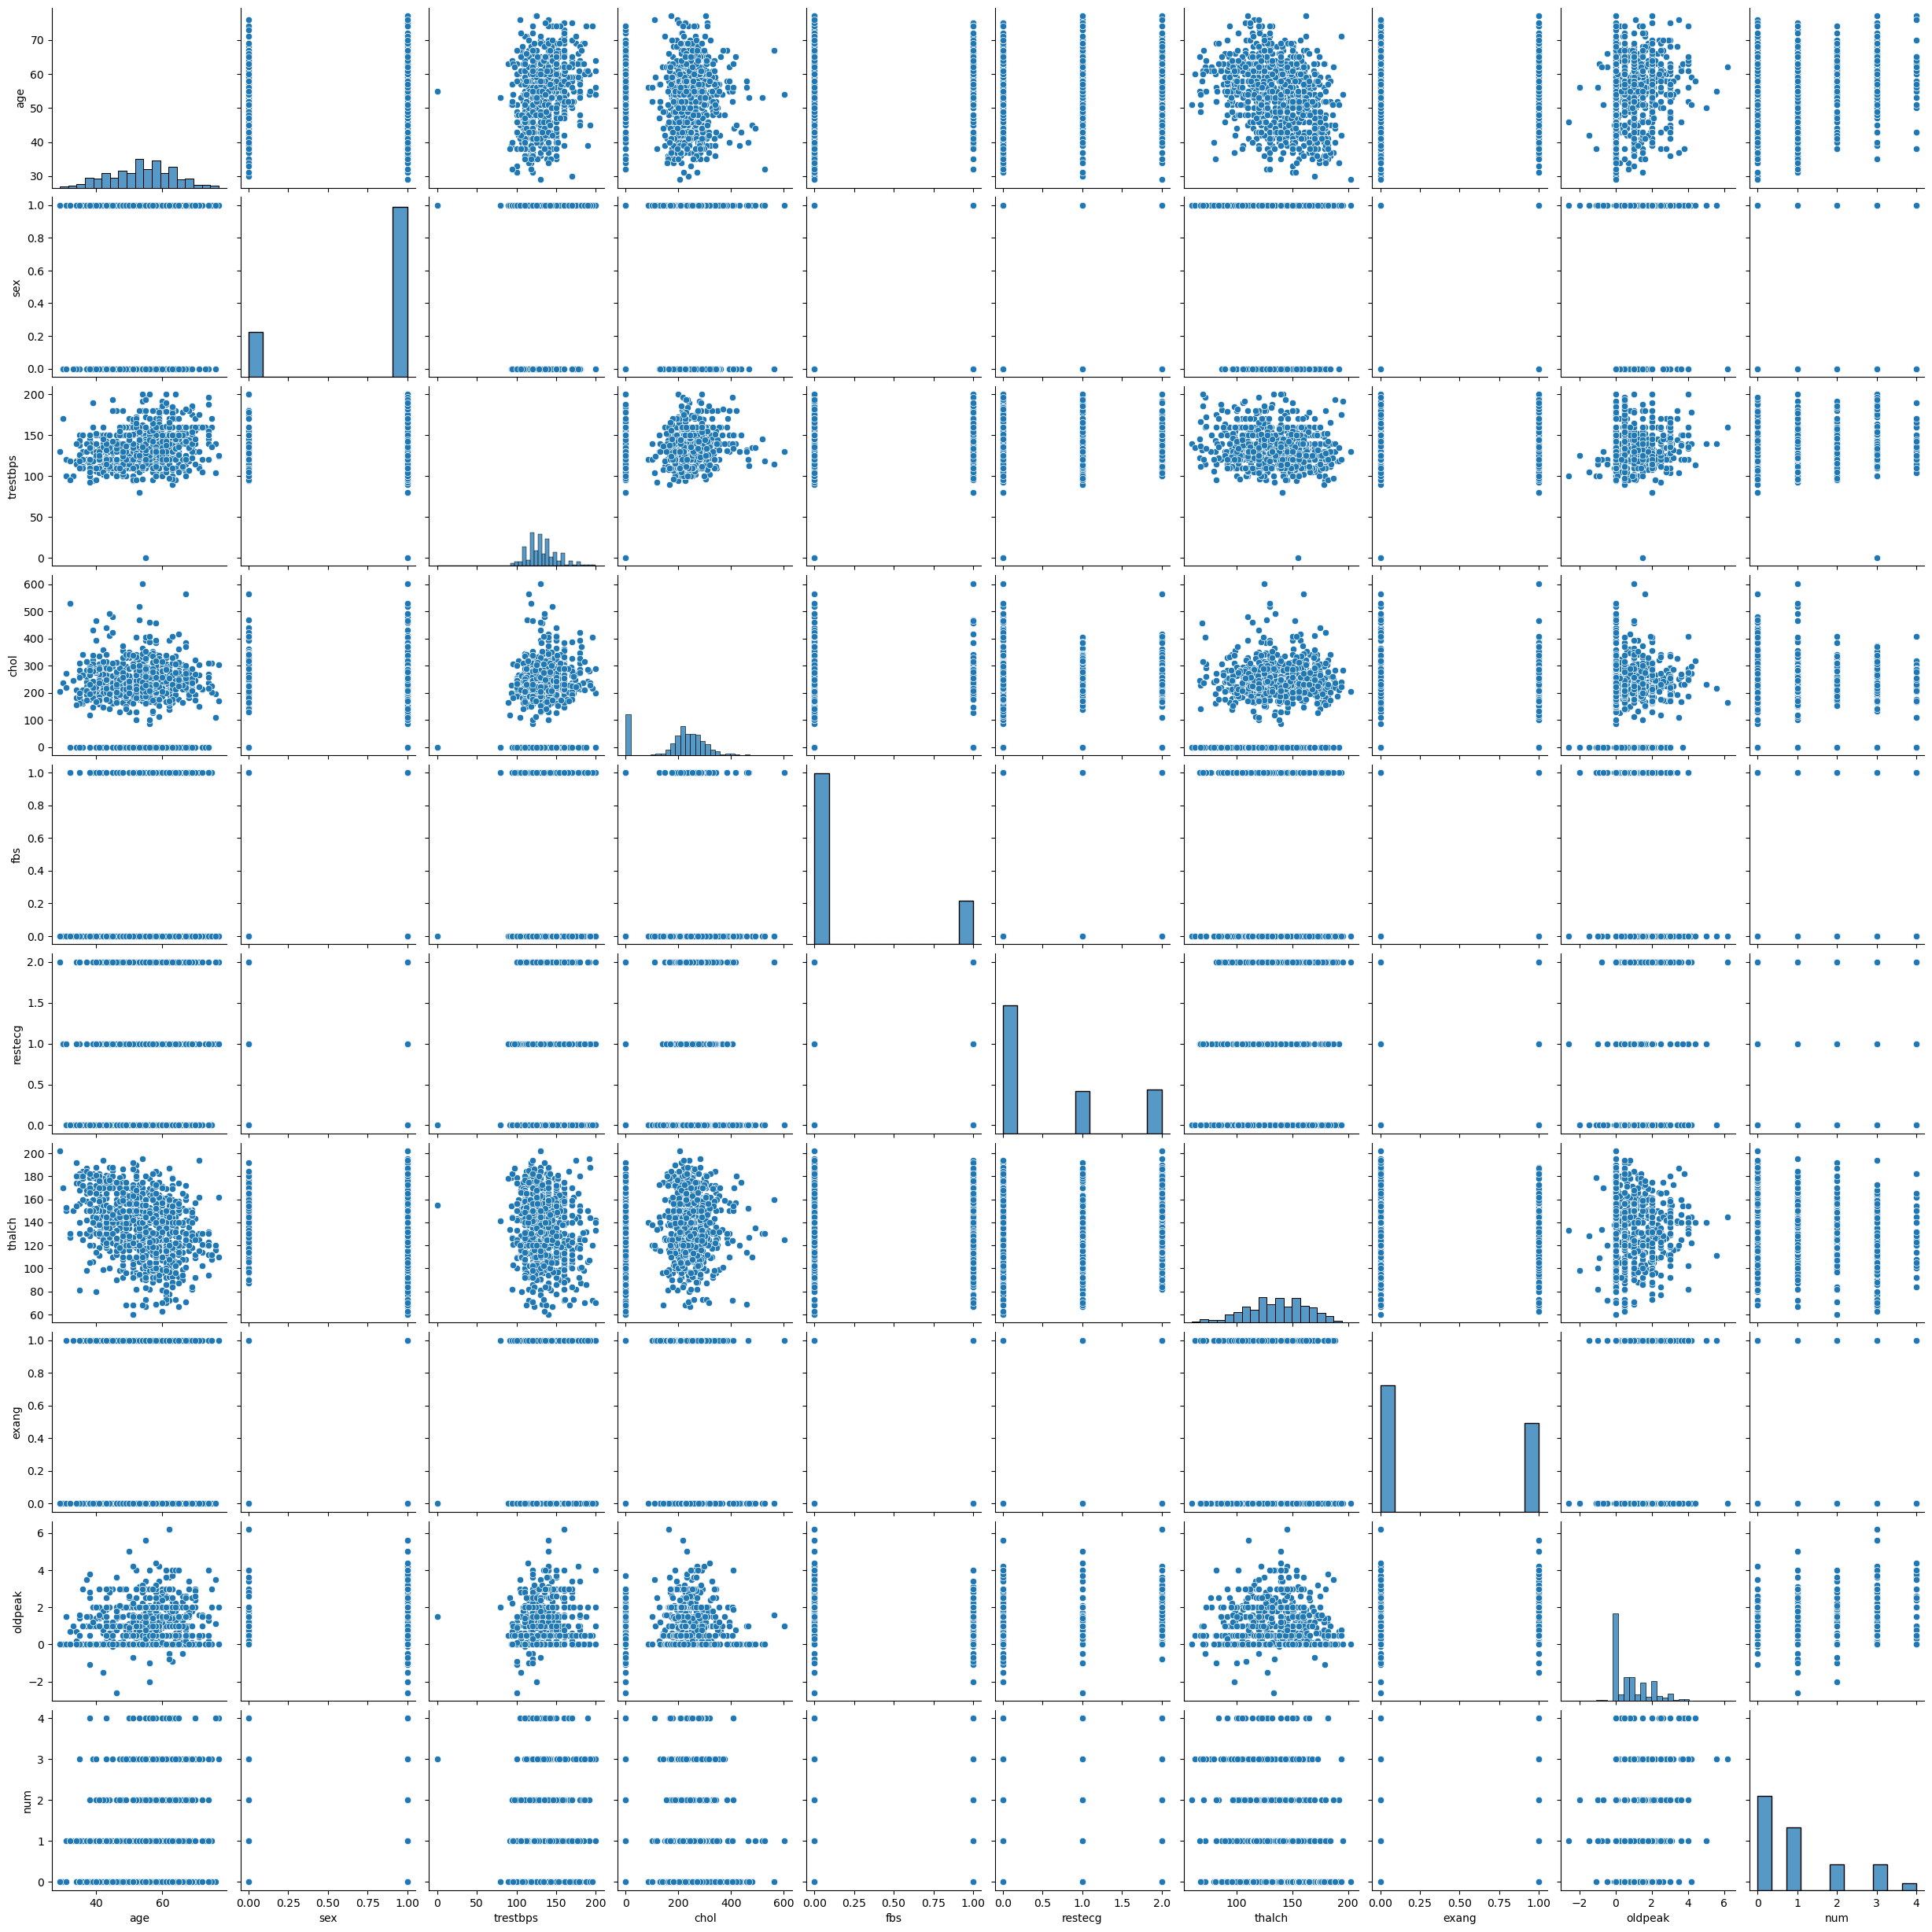

In [21]:
 sns.pairplot(df)

# Multivariate analysis

<Axes: >

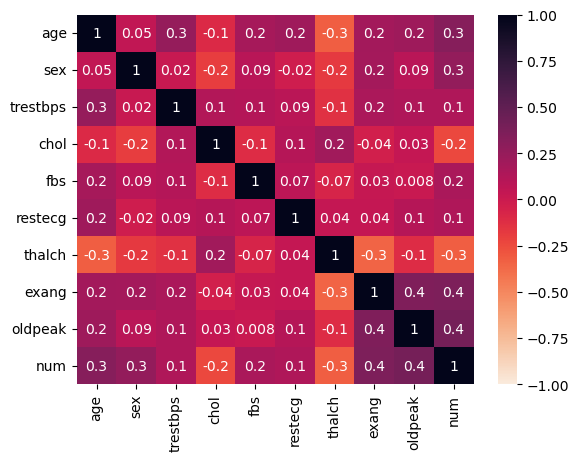

In [22]:
#Heatmap for finding correlation betwwen columns
sns.heatmap(df.select_dtypes(exclude=object).corr(),vmax=1,center=0,vmin=-1,annot=True,fmt='.1g',cmap="rocket_r")

# Data Encoding 

In [23]:
#Encoding the data for converting catogerical data to numerical data format
df = pd.get_dummies(df,columns=['cp','thal','slope'],dtype=int)
df

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,thal_fixed defect,thal_normal,thal_reversable defect,slope_downsloping,slope_flat,slope_upsloping
0,63,1,145,233,1,2,150,0,2.3,0,0,0,0,1,1,0,0,1,0,0
1,41,1,135,203,0,0,132,0,0.0,0,0,1,0,0,1,0,0,0,1,0
2,57,1,140,192,0,0,148,0,0.4,0,1,0,0,0,1,0,0,0,1,0
3,52,1,118,186,0,2,190,0,0.0,0,0,0,0,1,1,0,0,0,1,0
4,57,1,110,201,0,0,126,1,1.5,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,125,0,0,0,120,0,1.5,4,1,0,0,0,0,0,1,0,0,1
904,62,1,166,170,0,1,120,1,3.0,4,1,0,0,0,0,0,1,0,1,0
905,56,1,170,0,0,2,123,1,2.5,4,0,0,1,0,0,1,0,1,0,0
906,56,1,144,208,1,1,105,1,0.5,4,0,0,1,0,1,0,0,1,0,0


# Data Scaling

In [24]:
#Scaling down the data 
sc= StandardScaler()
x = sc.fit_transform(df.drop(columns='num'))
scaled_df = pd.DataFrame(data=x,columns=df.drop(columns='num').columns)
scaled_df

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,thal_fixed defect,thal_normal,thal_reversable defect,slope_downsloping,slope_flat,slope_upsloping
0,1.006027,0.514416,0.567394,0.281297,1.976894,1.725276,0.524183,-0.834983,1.354403,-1.094782,-0.471246,-0.536603,4.379244,2.039385,-0.859921,-0.784639,2.187108,-0.997800,-0.698945
1,-1.397560,0.514416,0.076967,0.013526,-0.505844,-0.755406,-0.147705,-0.834983,-0.815718,-1.094782,2.122034,-0.536603,-0.228350,2.039385,-0.859921,-0.784639,-0.457225,1.002205,-0.698945
2,0.350503,0.514416,0.322181,-0.084656,-0.505844,-0.755406,0.449529,-0.834983,-0.438305,0.913424,-0.471246,-0.536603,-0.228350,2.039385,-0.859921,-0.784639,-0.457225,1.002205,-0.698945
3,-0.195767,0.514416,-0.756760,-0.138211,-0.505844,1.725276,2.017268,-0.834983,-0.815718,-1.094782,-0.471246,-0.536603,4.379244,2.039385,-0.859921,-0.784639,-0.457225,1.002205,-0.698945
4,0.350503,0.514416,-1.149102,-0.004325,-0.505844,-0.755406,-0.371668,1.197629,0.599578,0.913424,-0.471246,-0.536603,-0.228350,2.039385,-0.859921,-0.784639,-0.457225,1.002205,-0.698945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,0.514416,-0.413461,-1.798388,-0.505844,-0.755406,-0.595631,-0.834983,0.599578,0.913424,-0.471246,-0.536603,-0.228350,-0.490344,-0.859921,1.274471,-0.457225,-0.997800,1.430727
904,0.896773,0.514416,1.597292,-0.281021,-0.505844,0.484935,-0.595631,1.197629,2.014874,0.913424,-0.471246,-0.536603,-0.228350,-0.490344,-0.859921,1.274471,-0.457225,1.002205,-0.698945
905,0.241249,0.514416,1.793463,-1.798388,-0.505844,1.725276,-0.483649,1.197629,1.543109,-1.094782,-0.471246,1.863574,-0.228350,-0.490344,1.162898,-0.784639,2.187108,-0.997800,-0.698945
906,0.241249,0.514416,0.518352,0.058155,1.976894,0.484935,-1.155538,1.197629,-0.343952,-1.094782,-0.471246,1.863574,-0.228350,2.039385,-0.859921,-0.784639,2.187108,-0.997800,-0.698945


# Spliting data set 

In [25]:
# Splitting the data into training and testing 
x=scaled_df
y=df['num']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.2)

In [26]:
#print the train test splitted data 
xtrain,xtest,ytrain,ytest

(          age       sex  trestbps      chol       fbs   restecg    thalch  \
 612  0.569011  0.514416 -0.413461 -1.798388 -0.505844 -0.755406 -0.632958   
 486 -1.506814  0.514416  0.910694  0.192040 -0.505844 -0.755406  1.681324   
 494 -0.305021  0.514416  0.322181  0.870392 -0.505844 -0.755406  1.382707   
 677  1.443043  0.514416 -0.658674  0.316999 -0.505844 -0.755406 -2.424660   
 233 -0.632783 -1.943951  2.283891  0.950723 -0.505844  0.484935 -0.408995   
 ..        ...       ...       ...       ...       ...       ...       ...   
 715  0.350503  0.514416 -1.149102  1.191717 -0.505844 -0.755406  0.262893   
 767  0.459757  0.514416  1.204950  0.272371 -0.505844  0.484935  0.076258   
 72  -0.742037  0.514416  0.224095  0.495513 -0.505844  1.725276  0.748146   
 235  0.896773  0.514416 -0.658674  0.165263 -0.505844  0.484935 -1.864753   
 37  -1.834576  0.514416 -0.756760  0.343777 -0.505844  1.725276  1.084090   
 
         exang   oldpeak  cp_asymptomatic  cp_atypical angina 

In [27]:
# Define the parameter grid for HyperParameter Tunning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=1), param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

In [28]:
# Fit the model
grid_search.fit(xtrain,ytrain)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [29]:
#Find the best Parameters for our model
best_params

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [30]:
best_score

0.5702220122815305

In [31]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3,max_features='auto',min_samples_leaf=1,min_samples_split=2)
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 3, 0, 3, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 3, 3, 1, 0, 3, 0, 0, 1, 1, 1,
       3, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 3, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 3, 1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 3, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 3, 1, 3, 1, 1, 1,
       0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 3, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1], dtype=int64)

In [32]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(xtest)
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='auto',
                       random_state=1)

In [33]:
print("Classification Report:")
print(classification_report(ytest,ypred))

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73        81
           1       0.38      0.56      0.45        52
           2       0.00      0.00      0.00        19
           3       0.20      0.12      0.15        25
           4       0.00      0.00      0.00         5

    accuracy                           0.52       182
   macro avg       0.25      0.29      0.27       182
weighted avg       0.45      0.52      0.47       182



In [34]:
IMP_Feature = pd.DataFrame(data=dt.feature_importances_,columns=['Importance'])
IMP_Feature['Column Name'] = scaled_df.columns

IMP_Feature

,Importance,Column Name
0,0.000000,age
1,0.000000,sex
2,0.000000,trestbps
3,0.000000,chol
4,0.000000,fbs
5,0.025109,restecg
6,0.044539,thalch
7,0.416542,exang
8,0.100511,oldpeak
9,0.271896,cp_asymptomatic


**Here age, cp asymptomatic and thal reversable defect are some of the most influencial columns in above data set**

In [35]:
print(f'Training accuracy: {dt.score(xtrain,ytrain)}')
print(f'Testing accuracy: {dt.score(xtest,ytest)}')

Training accuracy: 0.5730027548209367
Testing accuracy: 0.5164835164835165


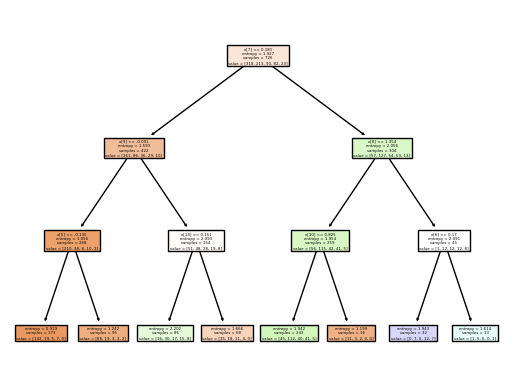

In [36]:
#Visual representation of Decision Tree with Max depth=3
tree.plot_tree(dt, filled=True, max_depth=3)
plt.show()